# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [2]:
# Your import 
import pandas as pd
import numpy as np

# Load the Pokémon dataset
pokemon_data =  pd.read_csv('pokemon.csv')

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [5]:
# Create a derived feature: sp_attack_to_sp_defense_ratio

# your code
pokemon_data['sp_attack_to_sp_defense_ratio'] = pokemon_data['sp_attack'] / pokemon_data['sp_defense']

# Select all features + derived  
# target: Legendary 
# Your code
features = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total_bs', 'capture_rt', 'sp_attack_to_sp_defense_ratio', 'type']
target = 'legendary'

# isolate features and the desired result
X = pokemon_data[features]
y = pokemon_data[target]

# print the tables to see what we're working with
print(X)
print(y)

     attack  defense  sp_attack  sp_defense  speed  total_bs  capture_rt  \
0        49       49         65          65     45       318          45   
1        62       63         80          80     60       405          45   
2       100      123        122         120     80       625          45   
3        52       43         60          50     65       309          45   
4        64       58         80          65     80       405          45   
..      ...      ...        ...         ...    ...       ...         ...   
796     101      103        107         101     61       570          25   
797     181      131         59          31    109       570         255   
798     101       53         97          53     43       570          15   
799     107      101        127          89     79       600           3   
800      95      115        130         115     65       600           3   

     sp_attack_to_sp_defense_ratio     type  
0                         1.000000    gra

### 2.2 Data Transformation Using ColumnTransformer

In [21]:
# Your import 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler

# ignore sklearn convergence warnings so they dont flood the output when doing incremental learning later 
import warnings
from sklearn.exceptions import ConvergenceWarning

# add a filter to ignore convergence warnings sent to the output
warnings.simplefilter("ignore", ConvergenceWarning)

# Categorical and numerical columns
categorical_features = ['type']
print("categorical_features:", categorical_features)

#exclude features in categorical_features
numeric_features = [col for col in features if col not in categorical_features]
print("numeric_features", numeric_features)

# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
numeric_transformer = MaxAbsScaler()
categorical_transformer = OneHotEncoder()

# construct a pre-processor to process the data for us. This is organized by data type 
# and assigned a corresponding processor  
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# print pre-processor info 
preprocessor

categorical_features: ['type']
numeric_features ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total_bs', 'capture_rt', 'sp_attack_to_sp_defense_ratio']


ColumnTransformer(transformers=[('num', MaxAbsScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'total_bs',
                                  'capture_rt',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [23]:
from sklearn.model_selection import train_test_split

# Transform the data

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=1925: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split


#Your code
X_transformed = preprocessor.fit_transform(X)

#split up the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=1925, stratify=y
)

# make two test sets from the test set output of the first split
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=1925, stratify=y_temp
)

X_train[:2], X_test[:2]

(array([[0.67567568, 0.17391304, 0.15463918, 0.13043478, 0.32222222,
         0.44871795, 0.17647059, 0.27007299, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ],
        [0.43243243, 0.39130435, 0.48969072, 0.39130435, 0.36111111,
         0.67948718, 0.17647059, 0.28507705, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ]]),
 array([[0.15675676, 0.13478261, 0.14948454, 0.13478261, 0.20555556,
         0.25641026, 0.17647059, 0.25264893, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 

## Step 3: Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state = 1925)

# Train Logistic Regression
logistic_model.fit(X_train, y_train)

# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.
y_val_prob_logistic = logistic_model.predict_proba(X_val)[:, 1]
print("y_val_prob_logistic: \n", y_val_prob_logistic)
auc_val_logistic = roc_auc_score(y_val, y_val_prob_logistic)

y_val_pred_logistic = logistic_model.predict(X_val)
print("y_val_pred_logistic: \n", y_val_pred_logistic)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)  # Use predicted labels here

print("Eli\'s Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

y_val_prob_logistic: 
 [8.24769105e-02 1.44252547e-03 1.67401182e-03 8.50038051e-02
 9.37368848e-02 6.44302545e-03 4.58727188e-04 5.01418138e-03
 2.86249255e-03 6.52940786e-03 5.39875252e-01 2.85390223e-01
 5.11823486e-04 3.77595208e-01 6.42438098e-03 6.36308362e-03
 7.40931383e-02 2.02762581e-01 1.83974081e-02 2.19922347e-02
 2.96595813e-02 8.23300888e-03 5.87487729e-04 2.78798869e-02
 6.92338860e-02 2.58869337e-02 7.88482356e-04 1.75067239e-01
 1.03925316e-02 7.08123147e-03 6.24527268e-02 4.84152144e-02
 2.68394566e-02 3.86880634e-02 1.36060835e-02 6.67751470e-02
 2.14135883e-02 3.64048386e-02 9.85866021e-02 5.71350963e-04
 5.88846100e-02 4.31906401e-03 7.25369490e-02 3.90007477e-02
 3.16146416e-03 5.41228283e-02 7.01068228e-04 1.42825701e-03
 1.20350160e-02 1.06456866e-02 5.53451771e-04 2.99143534e-03
 5.54795123e-03 7.12107008e-03 1.39996941e-02 2.61372837e-03
 5.08779103e-02 1.27025684e-01 1.11814828e-03 2.65975387e-03
 3.02472488e-03 4.33614037e-02 1.46310064e-02 4.48816339e-02
 

## Step 4: Multi-Layer Perceptron (MLP)

In [39]:
from sklearn.neural_network import MLPClassifier

# Please build your Multi-Layer Perceptron model

# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 1000
# Your code
mlp_model = MLPClassifier(hidden_layer_sizes=(3, 2), activation='relu', max_iter=1000, random_state=1925)

# I tried to limit the number of nodes to 4 given that the # of biases should be 4, but any way I 
# set up this model had poor results or cuased AUC to = 0.5. To avoid this I decided on using a 
# (3, 2) MLP as it gave the best results 

# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.
# Your code

# Train MLP Classifier
mlp_model.fit(X_train, y_train)

# Evaluate MLP Classifier
y_val_pred_mlp = mlp_model.predict(X_val)
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)

y_val_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]
auc_val_mlp = roc_auc_score(y_val, y_val_prob_mlp)

print("Eli\'s MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

Eli's MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       1.00      0.80      0.89        10

    accuracy                           0.98       120
   macro avg       0.99      0.90      0.94       120
weighted avg       0.98      0.98      0.98       120

Validation AUC: 0.9455
Validation accuracy: 0.9833


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Please record your loss of logistic regression with 500 iterations
# Your code

# Initialize the model with warm_start to fit incrementally
logistic_model = LogisticRegression(
    max_iter=1,  # Run one iteration at a time
    solver='saga',  # The saga solver supports recording loss values during optimization
    random_state=1925,
    warm_start=True  # Continue training from the last state, which allow manually record the loss at each iteration
)

# To store the loss values
loss_curve = []

# Train the model incrementally
# Your code
for i in range(1, 301):  # 300 iterations
    logistic_model.fit(X_train, y_train)  # Fit one iteration
    # Predict probabilities to calculate log loss
    y_train_prob = logistic_model.predict_proba(X_train)
    # Calculate the log loss and append to the loss curve
    loss = log_loss(y_train, y_train_prob)
    loss_curve.append(loss)


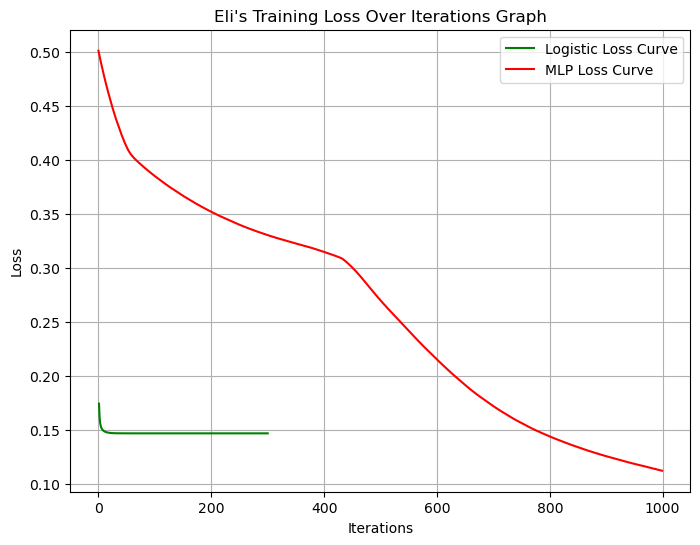

In [54]:
# Extract loss during MLP training
# Your code
mlp_model_loss_curve = mlp_model.loss_curve_
Logic_loss = loss_curve

# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
# Your code
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(Logic_loss) + 1), Logic_loss, label="Logistic Loss Curve", color="green")
plt.plot(mlp_model_loss_curve, label="MLP Loss Curve", color="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
yourname = "Eli\'s"
plt.title(yourname+" Training Loss Over Iterations Graph")
plt.grid()
plt.legend()
plt.show()

# that's weird...


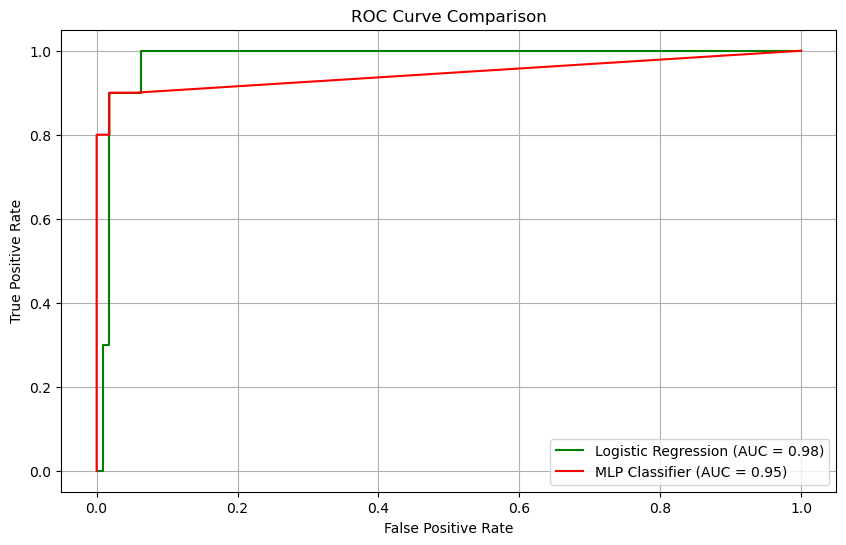

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Plot ROC Curve Comparison


# Plot ROC curves
# Your code 
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_prob_logistic)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_prob_mlp)
 
# please set color of Logistic as green, set MLP as red.
# Your code 
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {auc_val_logistic:.2f})", color="green")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP Classifier (AUC = {auc_val_mlp:.2f})", color="red")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show() 

# huh...

## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

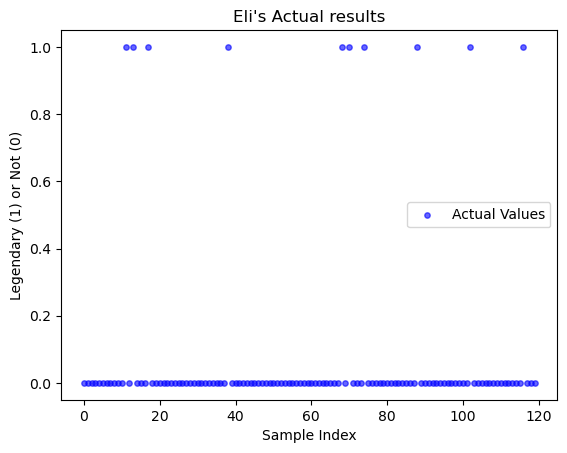

In [51]:
# Please plot the Actual data and Predicted for Logistic and MLP model
# Your code
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.6, label="Actual Values", s=15)
plt.title("Eli\'s Actual results")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()


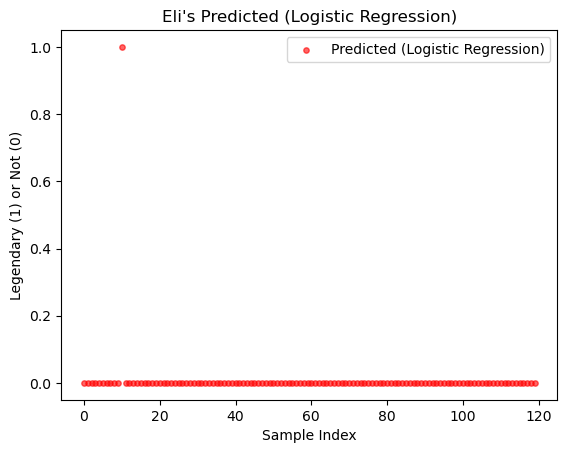

In [100]:
plt.scatter(range(len(y_val)), y_val_pred_logistic, color='red', alpha=0.6, label="Predicted (Logistic Regression)", s=15)
plt.title("Eli\'s Predicted (Logistic Regression)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

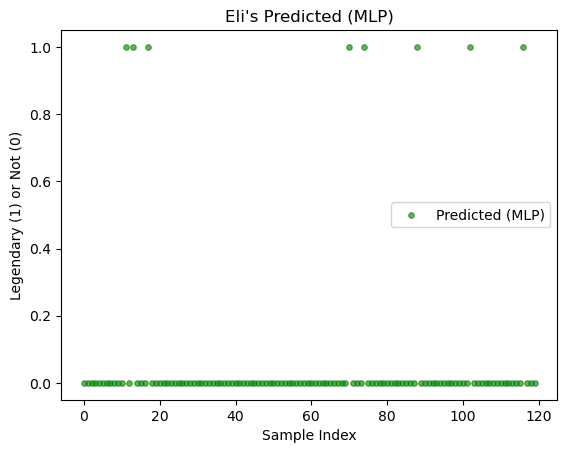

In [102]:
plt.scatter(range(len(y_val)), y_val_pred_mlp, color='green', alpha=0.6, label="Predicted (MLP)", s=15)
plt.title("Eli\'s Predicted (MLP)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()

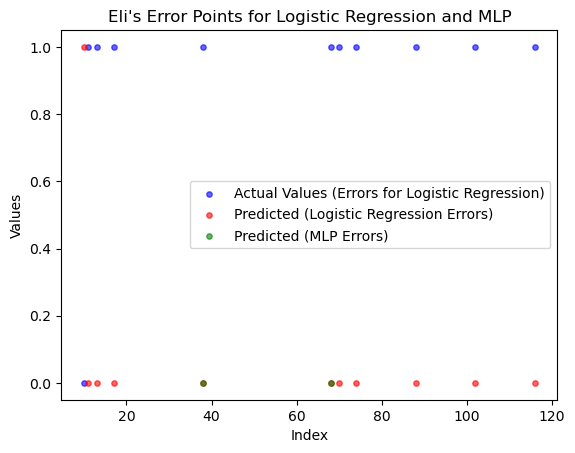

In [106]:
import matplotlib.pyplot as plt

# Identify error indices for Logistic Regression
errors_logistic = (y_val != y_val_pred_logistic)

# Identify error indices for MLP
errors_mlp = (y_val != y_val_pred_mlp)

# Plot the actual values at error indices
plt.scatter(
    np.where(errors_logistic)[0],  # Indices of errors for Logistic Regression
    y_val[errors_logistic],  # Actual values where Logistic Regression fails
    color='blue', alpha=0.6, label="Actual Values (Errors for Logistic Regression)", s=15
)

# # Plot the Logistic Regression predictions at error indices
plt.scatter(
    np.where(errors_logistic)[0],  # Indices of errors for Logistic Regression
    y_val_pred_logistic[errors_logistic],  # Predicted values where errors occur
    color='red', alpha=0.6, label="Predicted (Logistic Regression Errors)", s=15
)

# # Plot the MLP predictions at error indices
plt.scatter(
    np.where(errors_mlp)[0],  # Indices of errors for MLP
    y_val_pred_mlp[errors_mlp],  # Predicted values where errors occur
    color='green', alpha=0.6, label="Predicted (MLP Errors)", s=15
)

# Add plot details
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Eli\'s Error Points for Logistic Regression and MLP")
plt.legend()
plt.show()


### Confusion Matrices

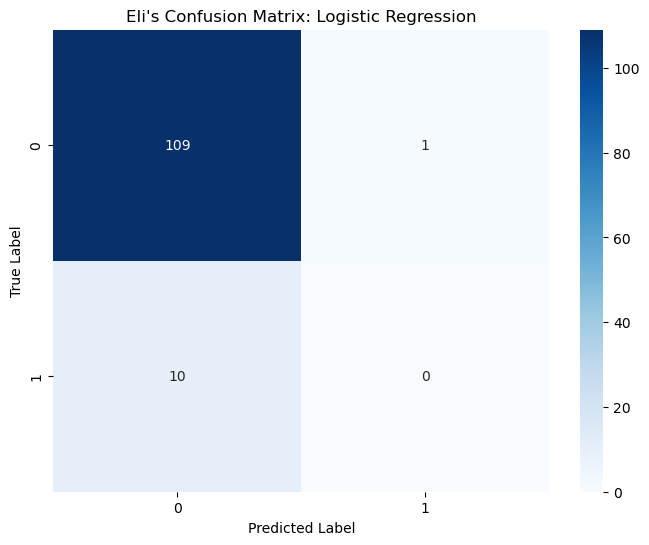

In [108]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression

# your code
cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues")
plt.title("Eli\'s Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

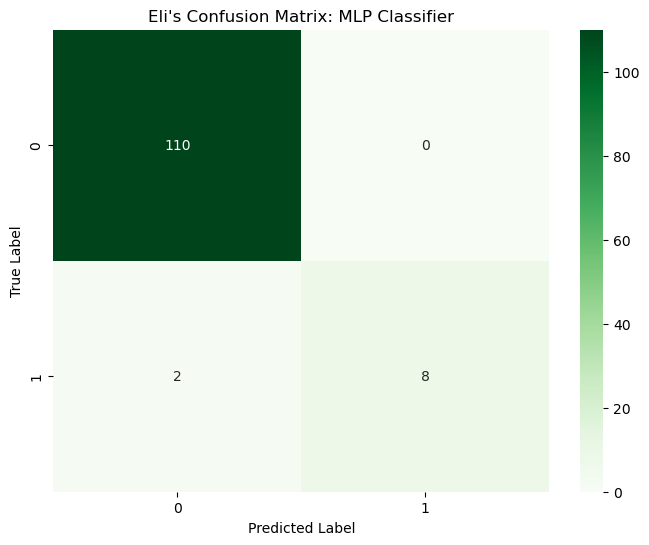

In [110]:
# plot MLP
# Your code
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens")
plt.title("Eli\'s Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



## Conclusion

In [112]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea: in the quiz, usually the regression is less accurate than the MLP network at
# predicting which pokemon is a legendary, but my MLP has some interesting problems so I didn't
# get the same result. The MLP takes many more iterations to feel as confident as the logistic
# regression so theoretically it can be more accurate because of that, but there can also be 
# prediction issues if the wrong parameters are set for the network. 